<a href="https://colab.research.google.com/github/PPatrickGU/ROB317/blob/main/ROB317_TP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ROB 317 TP1**


### *Author: Zheyi SHEN & Dajing GU*

In [19]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt


**Q1**

In [20]:
#Lecture image en niveau de gris et conversion en float64
img = np.float64(cv2.imread('./FlowerGarden2.png',0))
(h,w) = img.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes")

Dimension de l'image : 240 lignes x 360 colonnes


Méthode directe : 0.262659781 s
Méthode filter2D : 0.000640729 s


Text(0.5, 1.0, 'Convolution - filter2D')

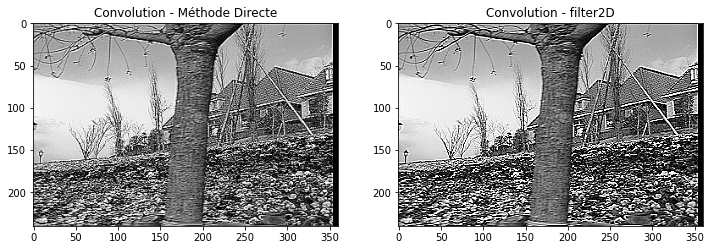

In [21]:
fig = plt.figure(figsize=(12, 8))

#Méthode directe
t1 = cv2.getTickCount()
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
  for x in range(1,w-1):
    val = 5*img[y, x] - img[y-1, x] - img[y, x-1] - img[y+1, x] - img[y, x+1] 
    img2[y,x] = min(max(val,0),255)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe :",time,"s")

plt.subplot(121)
plt.imshow(img2,cmap = 'gray')
plt.title('Convolution - Méthode Directe')

#Méthode filter2D
t1 = cv2.getTickCount()
kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
img3 = cv2.filter2D(img,-1,kernel)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode filter2D :",time,"s")

plt.subplot(122)
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('Convolution - filter2D')


**Q3: dI/dx, dI/dy**

Méthode directe : 0.92757991 s
#Gradient dI/dx - Méthode Directe 0.92757991 s
#Gradient dI/dx - Méthode filter2D 0.00057304 s
Méthode directe : 0.442057769 s
#Gradient dI/dy - Méthode Directe 0.442057769 s
#Gradient dI/dy - Méthode filter2D 0.000609456 s


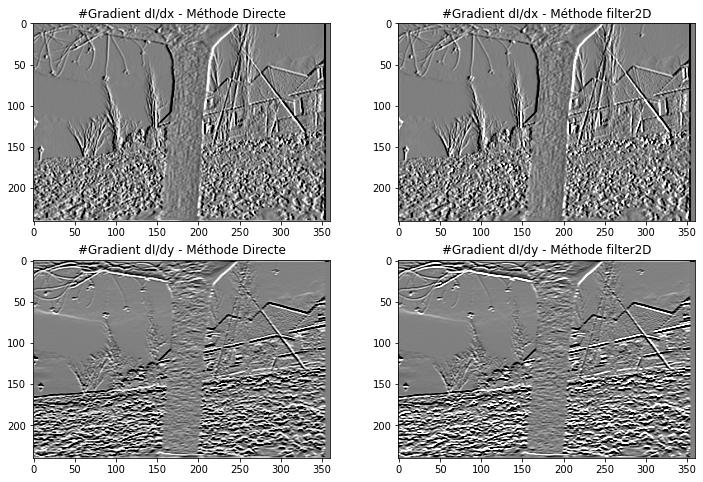

In [22]:
fig = plt.figure(figsize=(12, 8))

#Gradient dI/dx
img4 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
  for x in range(1,w-1):
    val = 0*img[y, x] - 0*img[y-1, x]- 0*img[y+1, x] - 2*img[y, x-1] + 2*img[y, x+1] - img[y-1, x-1] - img[y+1, x-1] + img[y+1, x+1] + img[y-1, x+1] 
    img4[y,x] = min(val,255)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe :",time,"s")
print("#Gradient dI/dx - Méthode Directe",time,"s")

plt.subplot(221)
plt.imshow(img4,cmap = 'gray',vmin = -255.0,vmax = 255.0)
plt.title('#Gradient dI/dx - Méthode Directe')

t1 = cv2.getTickCount()
hx = np.array([[-1, 0, 1],
          [-2, 0, 2],
          [-1, 0 ,1]])
img5 = cv2.filter2D(img,-1,hx)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("#Gradient dI/dx - Méthode filter2D",time,"s")

plt.subplot(222)
plt.imshow(img5,cmap = 'gray',vmin = -255.0,vmax = 255.0)
plt.title('#Gradient dI/dx - Méthode filter2D')

#Gradient dI/dy
img6 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
  for x in range(1,w-1):
    val = 0*img[y, x] - 2*img[y-1, x] + 2*img[y+1, x] - 0*img[y, x-1] + 0*img[y, x+1] - img[y-1, x-1] + img[y+1, x-1] + img[y+1, x+1] - img[y-1, x+1] 
    img6[y,x] = min(val,255)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe :",time,"s")
print("#Gradient dI/dy - Méthode Directe",time,"s")

plt.subplot(223)
plt.imshow(img6,cmap = 'gray',vmin = -255.0,vmax = 255.0)
plt.title('#Gradient dI/dy - Méthode Directe')

t1 = cv2.getTickCount()
hy = np.array([[-1, -2, -1],
        [0, 0, 0],
        [1, 2 ,1]])
img7 = cv2.filter2D(img,-1,hy)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("#Gradient dI/dy - Méthode filter2D",time,"s")

plt.subplot(224)
plt.imshow(img7,cmap = 'gray',vmin = -255.0,vmax = 255.0)
plt.title('#Gradient dI/dy - Méthode filter2D')

plt.show()


Text(0.5, 1.0, 'Orientation de gradient')

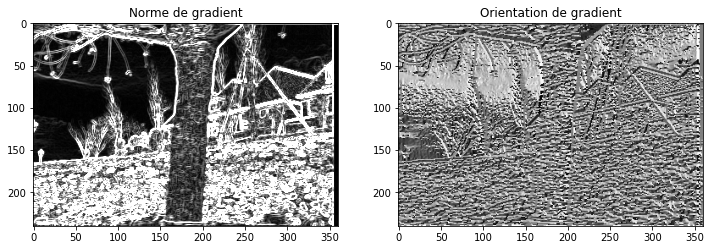

In [23]:
fig = plt.figure(figsize=(12, 8))
#Méthode gradient
img8 = np.sqrt(img5*img5+img7*img7)
plt.subplot(121)
plt.imshow(img8,cmap = 'gray', vmin=0.0, vmax=255.0)
plt.title('Norme de gradient')

img9 = np.arctan2(img7,img5)
plt.subplot(122)
plt.imshow(img9,cmap = 'gray',vmin = -math.pi,vmax = math.pi)
plt.title('Orientation de gradient')

**Q4, Q5: Harris**

Dimension de l'image : 320 lignes x 400 colonnes
Type de l'image : float64
Mon calcul des points de Harris : 0.010636624 s
Nombre de cycles par pixel : 83.098625 cpp
Dimension de l'image : 320 lignes x 400 colonnes x 3 canaux
Type de l'image : uint8


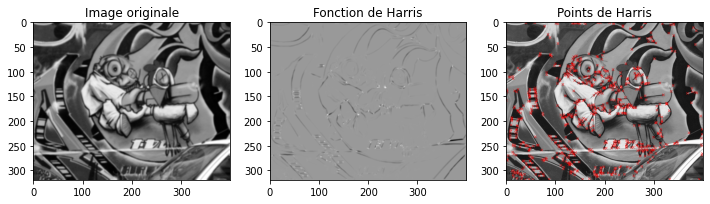

In [24]:
fig = plt.figure(figsize=(12, 8))
#Lecture image en niveau de gris et conversion en float64
img= cv2.GaussianBlur(cv2.imread('./Graffiti0.png',cv2.IMREAD_GRAYSCALE), (5,5), 0)
img=np.float64(img)
(h,w) = img.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes")
print("Type de l'image :",img.dtype)

#Début du calcul
t1 = cv2.getTickCount()  #get the time
Theta = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE) # make the border
# Mettre ici le calcul de la fonction d'intérêt de Harris
#

kernel1 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
kernel2 = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])
kernel3 = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]])

Ix = cv2.filter2D(Theta,-1,kernel1)
Iy = cv2.filter2D(Theta,-1,kernel2)

H11 = cv2.filter2D(Ix*Ix,-1,kernel3)
H12 = cv2.filter2D(Ix*Iy,-1,kernel3)
H21 = cv2.filter2D(Iy*Ix,-1,kernel3)
H22 = cv2.filter2D(Iy*Iy,-1,kernel3)

alpha = 0.06
#det() - alpha*np.trace()
Theta = (H11*H22 - H12*H21 -alpha*(H11+H22)**2)

#
# Calcul des maxima locaux et seuillage
Theta_maxloc = cv2.copyMakeBorder(Theta,0,0,0,0,cv2.BORDER_REPLICATE)
d_maxloc = 3
seuil_relatif = 0.01
se = np.ones((d_maxloc,d_maxloc),np.uint8)
Theta_dil = cv2.dilate(Theta,se)   #dilation 膨胀
#Suppression des non-maxima-locaux
Theta_maxloc[Theta < Theta_dil] = 0.0
#On néglige également les valeurs trop faibles
Theta_maxloc[Theta < seuil_relatif*Theta.max()] = 0.0
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Mon calcul des points de Harris :",time,"s")
print("Nombre de cycles par pixel :",(t2 - t1)/(h*w),"cpp")

plt.subplot(131)
plt.imshow(img,cmap = 'gray')
plt.title('Image originale')

plt.subplot(132)
plt.imshow(Theta,cmap = 'gray')
plt.title('Fonction de Harris')

se_croix = np.uint8([[1, 0, 0, 0, 1],
[0, 1, 0, 1, 0],[0, 0, 1, 0, 0],
[0, 1, 0, 1, 0],[1, 0, 0, 0, 1]])
Theta_ml_dil = cv2.dilate(Theta_maxloc,se_croix)
#Relecture image pour affichage couleur
Img_pts=cv2.imread('./Graffiti0.png',cv2.IMREAD_COLOR)
(h,w,c) = Img_pts.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes x",c,"canaux")
print("Type de l'image :",Img_pts.dtype)
#On affiche les points (croix) en rouge
Img_pts[Theta_ml_dil > 0] = [255,0,0]
plt.subplot(133)
plt.imshow(Img_pts)
plt.title('Points de Harris')

plt.show()

**Q6: ORB & KAZE**

In [25]:
detector = 1

Dimension de l'image 1 : 418 lignes x 402 colonnes
Type de l'image 1 : uint8
Dimension de l'image 2 : 418 lignes x 402 colonnes
Type de l'image 2 : uint8
Détecteur : ORB
Détection des points d'intérêt : 0.168187336 s


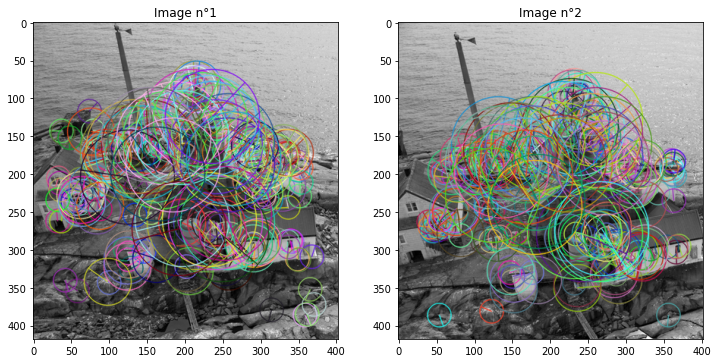

In [26]:
fig = plt.figure(figsize=(12, 8))

#Lecture de la paire d'images
img1 = cv2.imread('./torb_small1.png')
print("Dimension de l'image 1 :",img1.shape[0],"lignes x",img1.shape[1],"colonnes")
print("Type de l'image 1 :",img1.dtype)

img2 = cv2.imread('./torb_small2.png')
print("Dimension de l'image 2 :",img2.shape[0],"lignes x",img2.shape[1],"colonnes")
print("Type de l'image 2 :",img2.dtype)

#Début du calcul
t1 = cv2.getTickCount()
#Création des objets "keypoints"
if detector == 1:
  kp1 = cv2.ORB_create(nfeatures = 250,#Par défaut : 500
                       scaleFactor = 2,#Par défaut : 1.2
                       nlevels = 3)#Par défaut : 8
  kp2 = cv2.ORB_create(nfeatures=250,
                        scaleFactor = 2,
                        nlevels = 3)
  print("Détecteur : ORB")
else:
  kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		        threshold = 0.001,#Par défaut : 0.001
  		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  print("Détecteur : KAZE")
#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#Détection des keypoints
pts1 = kp1.detect(gray1,None)
pts2 = kp2.detect(gray2,None)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Détection des points d'intérêt :",time,"s")

#Affichage des keypoints
img1 = cv2.drawKeypoints(gray1, pts1, None, flags=4)
# flags définit le niveau d'information sur les points d'intérêt
# 0 : position seule ; 4 : position + échelle + direction
img2 = cv2.drawKeypoints(gray2, pts2, None, flags=4)

plt.subplot(121)
plt.imshow(img1)
plt.title('Image n°1')

plt.subplot(122)
plt.imshow(img2)
plt.title('Image n°2')

plt.show()


**Q9: Features_Match_RatioTest **

In [27]:
detector = 2

Dimension de l'image 1 : 278 lignes x 410 colonnes
Type de l'image 1 : uint8
[[ 6.123234e-17  1.000000e+00  6.600000e+01]
 [-1.000000e+00  6.123234e-17  3.440000e+02]]


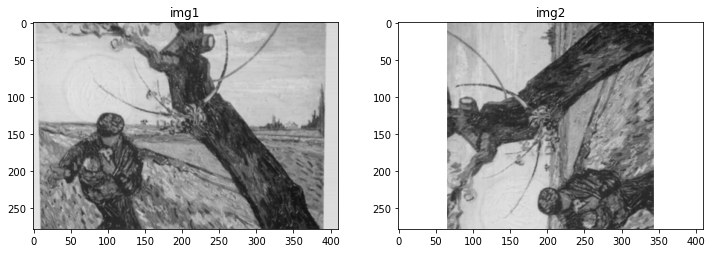

Dimension de l'image 1 : 278 lignes x 410 colonnes
Type de l'image 1 : uint8
Dimension de l'image 2 : 278 lignes x 410 colonnes
Type de l'image 2 : uint8
Détecteur : KAZE
Détection points et calcul descripteurs : 0.424325977 s
[<DMatch 0x7f8f42681530>, <DMatch 0x7f8f4227a7f0>]
Calcul de l'appariement : 0.073789014 s


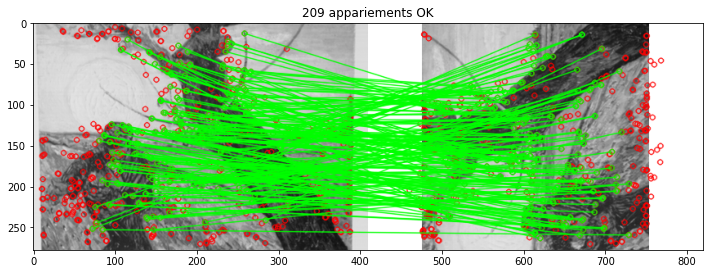

In [28]:
fig = plt.figure(figsize=(12, 8))

#Lecture de la paire d'images


img1 = cv2.imread('./VanGogh0.png')
print("Dimension de l'image 1 :",img1.shape[0],"lignes x",img1.shape[1],"colonnes")
print("Type de l'image 1 :",img1.dtype)

rows,cols,_ = img1.shape
matrix = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
print(matrix)

# Obtenez la matrice transformée, utilisez warpAffine pour transformer cette matrice
# Le premier paramètre est le centre de rotation, sous la forme d'un tuple, ici est fixé au centre de la photo
# Le deuxième paramètre 90 est l'angle de rotation
# Le troisième paramètre 1, indique le coefficient de mise à l'échelle, 1 indique de conserver la taille de l'image d'origine

img2 = cv2.warpAffine(img1,matrix,(cols,rows),borderValue=(255,255,255))
plt.subplot(121)
plt.imshow(img1),plt.title('img1')
plt.subplot(122)
plt.imshow(img2),plt.title('img2')
plt.show()


fig = plt.figure(figsize=(12, 8))
'''
img1 = cv2.imread('./torb_small1.png')
'''
print("Dimension de l'image 1 :",img1.shape[0],"lignes x",img1.shape[1],"colonnes")
print("Type de l'image 1 :",img1.dtype)
#img2 = cv2.imread('E:/Master/MI204/TP1_Features/Image_Pairs/torb_small2.png')
print("Dimension de l'image 2 :",img2.shape[0],"lignes x",img2.shape[1],"colonnes")
print("Type de l'image 2 :",img2.dtype)

#Début du calcul
t1 = cv2.getTickCount()
#Création des objets "keypoints"
if detector == 1:
  kp1 = cv2.ORB_create(nfeatures = 500,#Par défaut : 500
                       scaleFactor = 1.2,#Par défaut : 1.2
                       nlevels = 8)#Par défaut : 8
  kp2 = cv2.ORB_create(nfeatures=500,
                        scaleFactor = 1.2,
                        nlevels = 8)
  print("Détecteur : ORB")
else:
  kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		        threshold = 0.001,#Par défaut : 0.001
  		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  print("Détecteur : KAZE")
#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#Détection et description des keypoints
pts1, desc1 = kp1.detectAndCompute(gray1,None)
pts2, desc2 = kp2.detectAndCompute(gray2,None)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Détection points et calcul descripteurs :",time,"s")
# Calcul de l'appariement
t1 = cv2.getTickCount()
if detector == 1:
  #Distance de Hamming pour descripteur BRIEF (ORB)
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
else:
  #Distance L2 pour descripteur M-SURF (KAZE)
  bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
# Extraction de la liste des 2-plus-proches-voisins
matches = bf.knnMatch(desc1,desc2, k=2)
# Application du ratio test
print(matches[0])
good = []
for m,n in matches:
  if m.distance < 0.7*n.distance:
    good.append([m])
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Calcul de l'appariement :",time,"s")

# Affichage des appariements qui respectent le ratio test
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   flags = 0)
img3 = cv2.drawMatchesKnn(gray1,pts1,gray2,pts2,good,None,**draw_params)

Nb_ok = len(good)
plt.imshow(img3),plt.title('%i appariements OK'%Nb_ok)
plt.show()

**Q9: Features_Match_CrossCheck**

In [29]:
detector = 2

Dimension de l'image 1 : 278 lignes x 410 colonnes
Type de l'image 1 : uint8
[[ 6.123234e-17  1.000000e+00  6.600000e+01]
 [-1.000000e+00  6.123234e-17  3.440000e+02]]


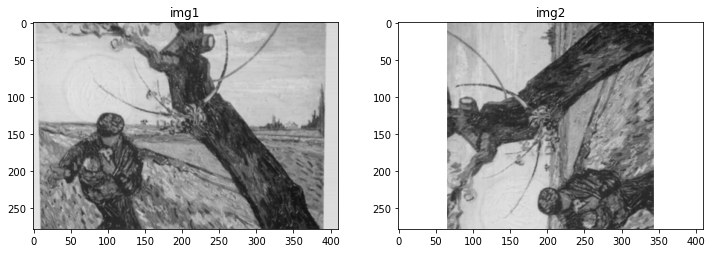

Détecteur : KAZE
Détection points et calcul descripteurs : 0.493034008 s
Calcul de l'appariement : 0.0095904 s


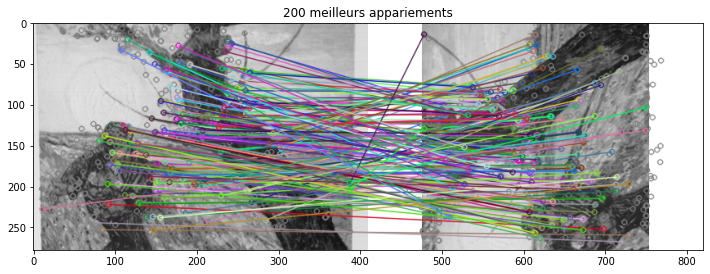

In [30]:

fig = plt.figure(figsize=(12, 8))

# Lecture de la paire d'images


img1 = cv2.imread('./VanGogh0.png')
print("Dimension de l'image 1 :",img1.shape[0],"lignes x",img1.shape[1],"colonnes")
print("Type de l'image 1 :",img1.dtype)

rows,cols,_ = img1.shape
matrix = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
print(matrix)


img2 = cv2.warpAffine(img1,matrix,(cols,rows),borderValue=(255,255,255))
plt.subplot(121)
plt.imshow(img1),plt.title('img1')
plt.subplot(122)
plt.imshow(img2),plt.title('img2')
plt.show()

fig = plt.figure(figsize=(12, 8))
'''
img2 = cv2.imread('./Vangogh8.png')
print("Dimension de l'image 2 :",img2.shape[0],"lignes x",img2.shape[1],"colonnes")
print("Type de l'image 2 :",img2.dtype)
'''
#Début du calcul
t1 = cv2.getTickCount()
#Création des objets "keypoints"
if detector == 1:
  kp1 = cv2.ORB_create(nfeatures = 500,#Par défaut : 500
                       scaleFactor = 1.2,#Par défaut : 1.2
                       nlevels = 8)#Par défaut : 8
  kp2 = cv2.ORB_create(nfeatures=500,
                        scaleFactor = 1.2,
                        nlevels = 8)
  print("Détecteur : ORB")
else:
  kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		        threshold = 0.001,#Par défaut : 0.001
  		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  print("Détecteur : KAZE")
#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#Détection et description des keypoints
pts1, desc1 = kp1.detectAndCompute(gray1,None)
pts2, desc2 = kp2.detectAndCompute(gray2,None)
#Les points non appariés apparaîtront en gris 
img1 = cv2.drawKeypoints(gray1, pts1, None, color=(127,127,127), flags=0)
img2 = cv2.drawKeypoints(gray2, pts2, None, color=(127,127,127), flags=0)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Détection points et calcul descripteurs :",time,"s")
# Calcul de l'appariement
t1 = cv2.getTickCount()
if detector == 1:
  #Distance de Hamming pour descripteur BRIEF (ORB)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
else:
  #Distance L2 pour descripteur M-SURF (KAZE)
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(desc1,desc2)
# Tri des appariemements 
matches = sorted(matches, key = lambda x:x.distance)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Calcul de l'appariement :",time,"s")

# Trace les N meilleurs appariements
Nbest = 200
img3 = cv2.drawMatches(img1,pts1,img2,pts2,matches[:Nbest],None,flags=2)
plt.imshow(img3),plt.title('%i meilleurs appariements'%Nbest)
plt.show()

**Q9: Features_Match_FLANN**

In [31]:
detector = 1

Dimension de l'image 1 : 278 lignes x 410 colonnes
Type de l'image 1 : uint8
[[ 6.123234e-17  1.000000e+00  6.600000e+01]
 [-1.000000e+00  6.123234e-17  3.440000e+02]]


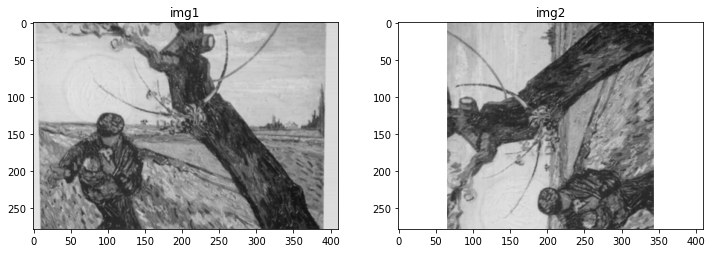

Dimension de l'image 1 : 278 lignes x 410 colonnes
Type de l'image 1 : uint8
Dimension de l'image 2 : 278 lignes x 410 colonnes
Type de l'image 2 : uint8
Détecteur : ORB
Détection points et calcul descripteurs : 0.021788057 s
Calcul de l'appariement : 0.004483698 s


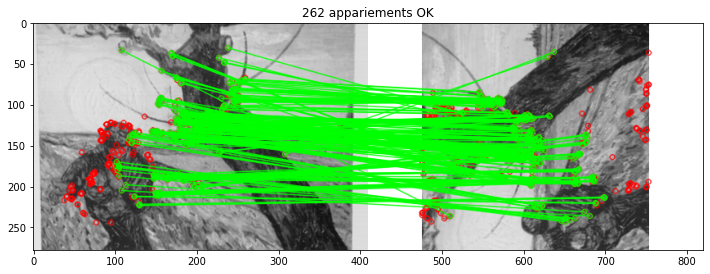

In [32]:
fig = plt.figure(figsize=(12, 8))
img1 = cv2.imread('./VanGogh0.png')
print("Dimension de l'image 1 :",img1.shape[0],"lignes x",img1.shape[1],"colonnes")
print("Type de l'image 1 :",img1.dtype)
 
rows,cols,_ = img1.shape
matrix = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
print(matrix)
 
img2 = cv2.warpAffine(img1,matrix,(cols,rows),borderValue=(255,255,255))
plt.subplot(121)
plt.imshow(img1),plt.title('img1')
plt.subplot(122)
plt.imshow(img2),plt.title('img2')
plt.show()
 
fig = plt.figure(figsize=(12, 8))
#img1 = cv2.imread(./torb_small1.png')
print("Dimension de l'image 1 :",img1.shape[0],"lignes x",img1.shape[1],"colonnes")
print("Type de l'image 1 :",img1.dtype)
#img2 = cv2.imread('./torb_small2.png')
print("Dimension de l'image 2 :",img2.shape[0],"lignes x",img2.shape[1],"colonnes")
print("Type de l'image 2 :",img2.dtype)
 
#Début du calcul
t1 = cv2.getTickCount()
#Création des objets "keypoints"
if detector == 1:
  kp1 = cv2.ORB_create(nfeatures = 500,#Par défaut : 500
                       scaleFactor = 1.2,#Par défaut : 1.2
                       nlevels = 8)#Par défaut : 8
  kp2 = cv2.ORB_create(nfeatures=500,
                        scaleFactor = 1.2,
                        nlevels = 8)
  print("Détecteur : ORB")
else:
  kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
                    threshold = 0.001,#Par défaut : 0.001
                nOctaves = 4,#Par défaut : 4
                nOctaveLayers = 4,#Par défaut : 4
                diffusivity = 2)#Par défaut : 2
  kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
                threshold = 0.001,#Par défaut : 0.001
                nOctaves = 4,#Par défaut : 4
                nOctaveLayers = 4,#Par défaut : 4
                diffusivity = 2)#Par défaut : 2
  print("Détecteur : KAZE")
#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#Détection et description des keypoints
pts1, desc1 = kp1.detectAndCompute(gray1,None)
pts2, desc2 = kp2.detectAndCompute(gray2,None)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Détection points et calcul descripteurs :",time,"s")
# Calcul de l'appariement
t1 = cv2.getTickCount()
# Paramètres de FLANN 
FLANN_INDEX_KDTREE = 0
FLANN_INDEX_LSH = 6
if detector == 1:
    index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2S
else:
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) 
 
flann = cv2.FlannBasedMatcher(index_params,search_params)
 
matches = flann.knnMatch(desc1,desc2,k=2)
# Application du ratio test
good = []
for m,n in matches:
  if m.distance < 0.7*n.distance:
    good.append([m])
 
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Calcul de l'appariement :",time,"s")
 
# Affichage
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   flags = 0)
 
# Affichage des appariements qui respectent le ratio test
img3 = cv2.drawMatchesKnn(gray1,pts1,gray2,pts2,good,None,**draw_params)
 
Nb_ok = len(good)
plt.imshow(img3),plt.title('%i appariements OK'%Nb_ok)
plt.show()